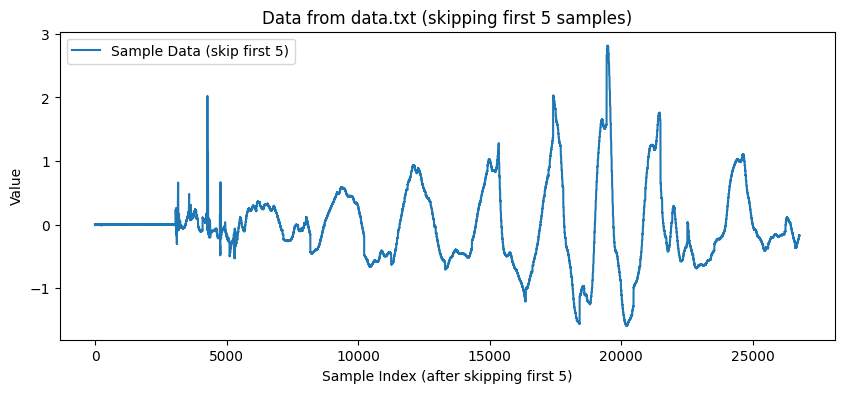

In [53]:
import matplotlib.pyplot as plt

# 파일에서 데이터 읽기
data_file = 'data_from_32bit_2.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

# 초기 5개 값 무시
data_to_plot = data[5:]

# 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(data_to_plot, label='Sample Data (skip first 5)')
plt.xlabel('Sample Index (after skipping first 5)')
plt.ylabel('Value')
plt.title('Data from data.txt (skipping first 5 samples)')
plt.legend()
plt.show()


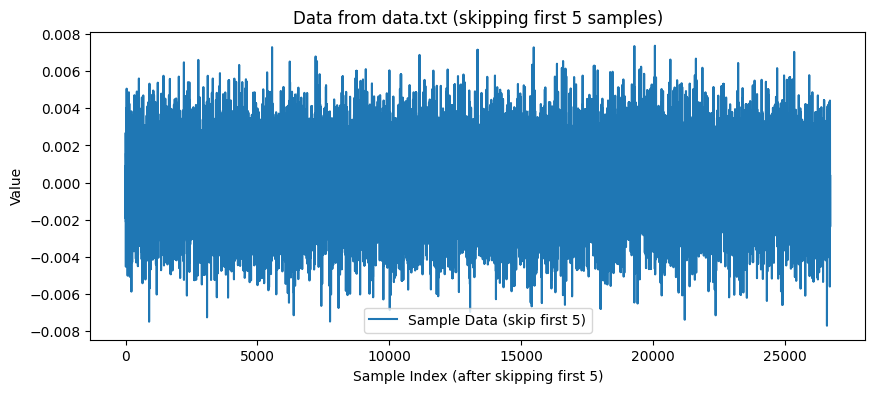

In [54]:
import matplotlib.pyplot as plt

# 파일에서 데이터 읽기
data_file = '600_N.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

# 초기 5개 값 무시
data_to_plot = data[5:]

# 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(data_to_plot, label='Sample Data (skip first 5)')
plt.xlabel('Sample Index (after skipping first 5)')
plt.ylabel('Value')
plt.title('Data from data.txt (skipping first 5 samples)')
plt.legend()
plt.show()


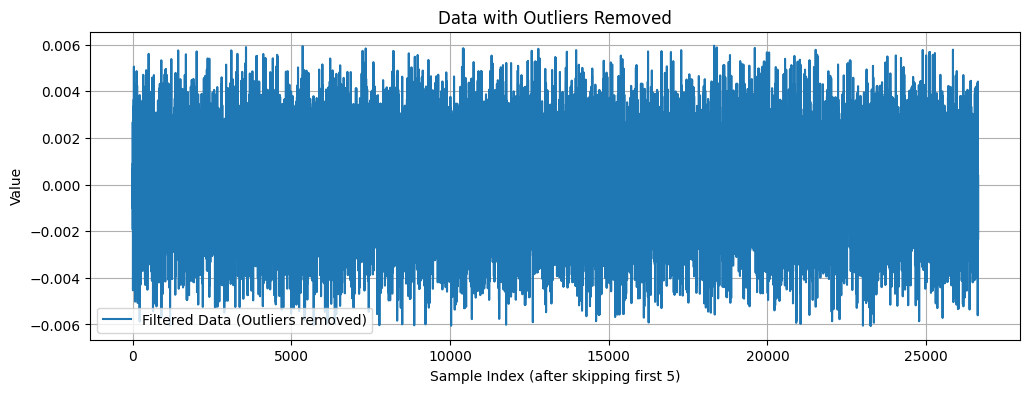

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 파일에서 데이터 읽기
data_file = '600_N.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

data = np.array(data)

# 초기 5개 값 무시
data = data[5:]

# 이상치 제거: 평균 ± 3*표준편차 범위 밖 값 제거
mean = np.mean(data)
std = np.std(data)
threshold = 3  # 3표준편차
filtered_data = data[(data > mean - threshold*std) & (data < mean + threshold*std)]

# 그래프 그리기
plt.figure(figsize=(12, 4))
plt.plot(filtered_data, label='Filtered Data (Outliers removed)')
plt.xlabel('Sample Index (after skipping first 5)')
plt.ylabel('Value')
plt.title('Data with Outliers Removed')
plt.legend()
plt.grid(True)
plt.show()


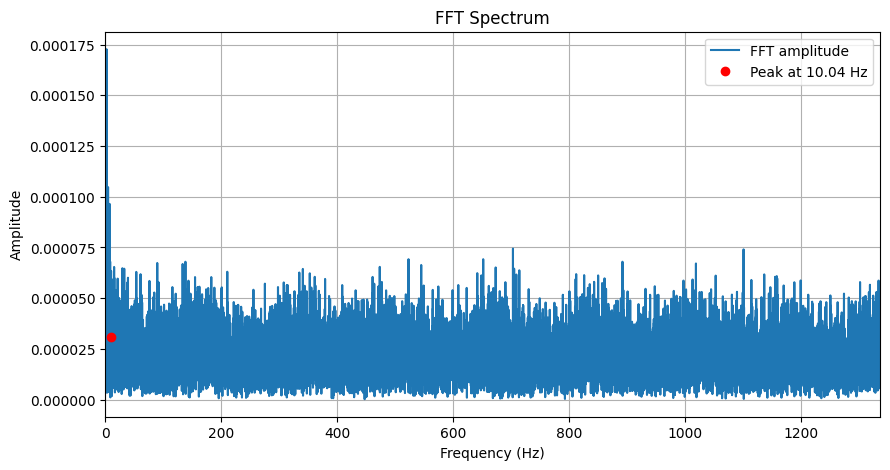

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data_file = '600_N_2.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

data = np.array(data)

# # 초기 5개 값 무시
# data = data[5:]

# # 이상치 제거: 평균 ± 3*표준편차 범위 밖 값 제거
# mean = np.mean(data)
# std = np.std(data)
# threshold = 3  # 3표준편차
# filtered_data = data[(data > mean - threshold*std) & (data < mean + threshold*std)]

filtered_data = data

# 2. 샘플링 정보
fs = 2672.2  # Hz
N = len(filtered_data)  # 데이터 포인트 수

# 3. FFT 계산
fft_vals = np.fft.fft(filtered_data)
fft_freq = np.fft.fftfreq(N, d=1/fs)

# 진폭 스펙트럼 (양쪽 대칭 중 양쪽 절반만)
fft_amp = 2.0/N * np.abs(fft_vals[:N//2])
fft_freq = fft_freq[:N//2]

# 4. 피크 표시 (600 RPM = 10 Hz)
target_freq = 10  # Hz
# target_freq에 가장 가까운 인덱스 찾기
peak_idx = np.argmin(np.abs(fft_freq - target_freq))
peak_val = fft_amp[peak_idx]

# 5. 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(fft_freq, fft_amp, label='FFT amplitude')
plt.plot(fft_freq[peak_idx], peak_val, 'ro', label=f'Peak at {fft_freq[peak_idx]:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum')
plt.legend()
plt.grid(True)
plt.xlim(0, fs/2)  # Nyquist 주파수까지
plt.show()


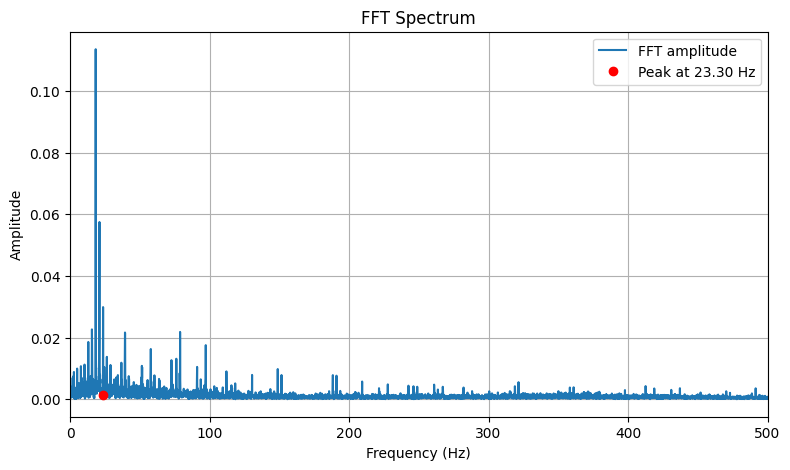

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data_file = '1400_N_2.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

data = np.array(data)

filtered_data = data

# 2. 샘플링 정보
fs = 2719.4  # Hz
N = len(filtered_data)  # 데이터 포인트 수

# 3. FFT 계산
fft_vals = np.fft.fft(filtered_data)
fft_freq = np.fft.fftfreq(N, d=1/fs)

# 진폭 스펙트럼 (양쪽 대칭 중 양쪽 절반만)
fft_amp = 2.0/N * np.abs(fft_vals[:N//2])
fft_freq = fft_freq[:N//2]

# 4. 피크 표시 (600 RPM = 10 Hz)
target_freq = 23.33   # Hz
# target_freq에 가장 가까운 인덱스 찾기
peak_idx = np.argmin(np.abs(fft_freq - target_freq))
peak_val = fft_amp[peak_idx]

# 5. 그래프 그리기
plt.figure(figsize=(9,5))
plt.plot(fft_freq, fft_amp, label='FFT amplitude')
plt.plot(fft_freq[peak_idx], peak_val, 'ro', label=f'Peak at {fft_freq[peak_idx]:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)  # Nyquist 주파수까지
plt.show()


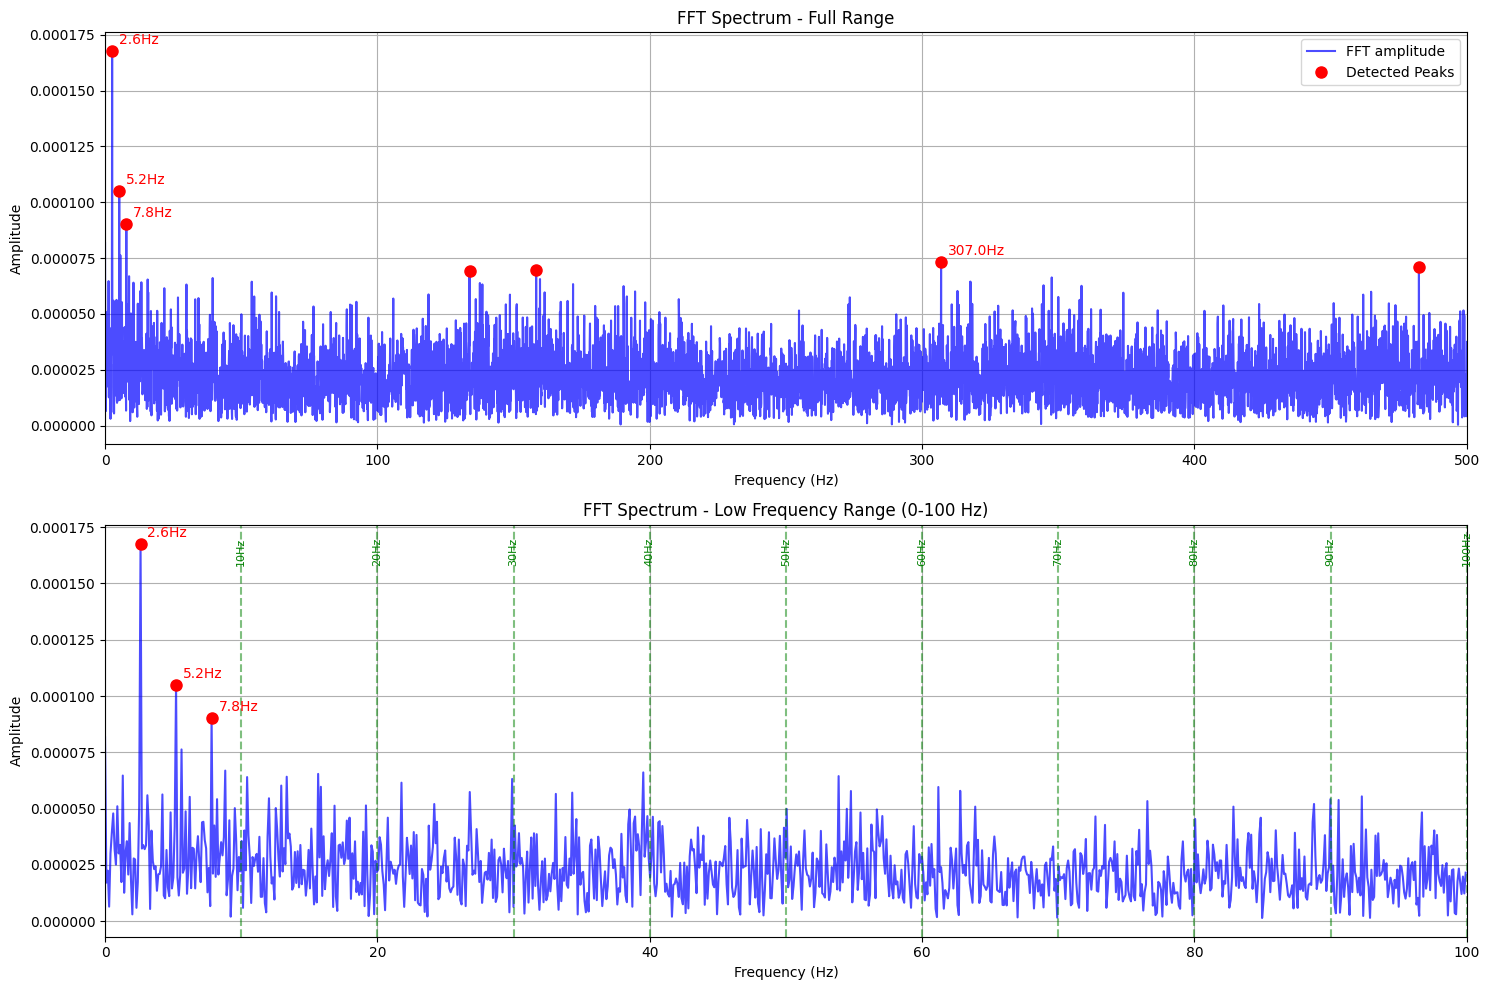

=== 검출된 피크 정보 ===
총 642개의 피크가 검출되었습니다.

상위 10개 피크 (진폭 순):
순위  주파수(Hz)   진폭     600RPM 대비
----------------------------------------
 1.      2.61   0.0002     0.3x
 2.      5.22   0.0001     0.5x
 3.      7.82   0.0001     0.8x
 4.    306.97   0.0001    30.7x
 5.   1023.03   0.0001   102.3x
 6.    482.42   0.0001    48.2x
 7.    158.30   0.0001    15.8x
 8.   1299.60   0.0001   130.0x
 9.    133.82   0.0001    13.4x
10.    551.04   0.0001    55.1x

특별히 주목할 피크들:
• 하모닉 성분들:
• 비하모닉 피크들 (베어링, 기어, 공명 등 의심):
  2.61Hz (진폭: 0.0002) - 0.3x 기본 주파수
  5.22Hz (진폭: 0.0001) - 0.5x 기본 주파수
  7.82Hz (진폭: 0.0001) - 0.8x 기본 주파수
  306.97Hz (진폭: 0.0001) - 30.7x 기본 주파수
  1023.03Hz (진폭: 0.0001) - 102.3x 기본 주파수
  482.42Hz (진폭: 0.0001) - 48.2x 기본 주파수
  158.30Hz (진폭: 0.0001) - 15.8x 기본 주파수
  1299.60Hz (진폭: 0.0001) - 130.0x 기본 주파수


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# 간단한 피크 찾기 함수
def find_peaks_simple(data, height_threshold=None, distance=5):
    """
    간단한 피크 찾기 함수
    data: 입력 데이터
    height_threshold: 최소 높이 (기본값: 전체 최대값의 5%)
    distance: 피크 간 최소 거리
    """
    if height_threshold is None:
        height_threshold = 0.05 * np.max(data)  # 5% 임계값
    
    peaks = []
    for i in range(distance, len(data) - distance):
        # 현재 점이 주변 점들보다 높고, 임계값보다 크면 피크
        if (data[i] > height_threshold and 
            data[i] > data[i-1] and data[i] > data[i+1] and
            all(data[i] >= data[i-j] for j in range(1, distance+1)) and
            all(data[i] >= data[i+j] for j in range(1, distance+1))):
            peaks.append(i)
    
    return np.array(peaks)

# 1. 데이터 불러오기
data_file = '600_N_2.txt'
data = []
with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue

data = np.array(data)
data = data[5:]  # 초기 5개 값 무시

# 이상치 제거
mean = np.mean(data)
std = np.std(data)
threshold = 3
filtered_data = data[(data > mean - threshold*std) & (data < mean + threshold*std)]

# 2. 샘플링 정보
fs = 2662.4  # Hz
N = len(filtered_data)

# 3. FFT 계산
fft_vals = np.fft.fft(filtered_data)
fft_freq = np.fft.fftfreq(N, d=1/fs)
fft_amp = 2.0/N * np.abs(fft_vals[:N//2])
fft_freq = fft_freq[:N//2]

# 4. 자동 피크 찾기
peaks = find_peaks_simple(fft_amp, height_threshold=0.03*np.max(fft_amp), distance=10)

# 피크를 진폭 크기 순으로 정렬 (상위 10개)
peak_heights = fft_amp[peaks]
sorted_indices = np.argsort(peak_heights)[::-1]
top_peaks = peaks[sorted_indices[:min(10, len(peaks))]]  # 최대 10개

# 5. 그래프 그리기
plt.figure(figsize=(15, 10))

# 전체 스펙트럼
plt.subplot(2, 1, 1)
plt.plot(fft_freq, fft_amp, 'b-', alpha=0.7, label='FFT amplitude')
plt.plot(fft_freq[top_peaks], fft_amp[top_peaks], 'ro', markersize=8, label='Detected Peaks')

# 상위 피크들에 주파수 라벨 표시
for i, peak_idx in enumerate(top_peaks[:5]):  # 상위 5개만 표시
    plt.annotate(f'{fft_freq[peak_idx]:.1f}Hz', 
                (fft_freq[peak_idx], fft_amp[peak_idx]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, ha='left', color='red')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum - Full Range')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)  # 0-500Hz 범위만 표시 (전체 나이퀴스트는 너무 넓음)

# 저주파 영역 확대 (0-100Hz)
plt.subplot(2, 1, 2)
low_freq_mask = fft_freq <= 100
plt.plot(fft_freq[low_freq_mask], fft_amp[low_freq_mask], 'b-', alpha=0.7)

# 100Hz 이하의 피크만 표시
low_freq_peaks = top_peaks[fft_freq[top_peaks] <= 100]
plt.plot(fft_freq[low_freq_peaks], fft_amp[low_freq_peaks], 'ro', markersize=8)

# 모든 저주파 피크에 라벨 표시
for peak_idx in low_freq_peaks:
    plt.annotate(f'{fft_freq[peak_idx]:.1f}Hz', 
                (fft_freq[peak_idx], fft_amp[peak_idx]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, ha='left', color='red')

# 600RPM = 10Hz와 그 하모닉들 표시
fundamental = 10.0
harmonics = [fundamental * i for i in range(1, 11) if fundamental * i <= 100]
for harm in harmonics:
    plt.axvline(x=harm, color='g', linestyle='--', alpha=0.5)
    plt.text(harm, plt.ylim()[1]*0.9, f'{harm:.0f}Hz', 
             rotation=90, ha='center', fontsize=8, color='green')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum - Low Frequency Range (0-100 Hz)')
plt.grid(True)
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

# 결과 출력
print("=== 검출된 피크 정보 ===")
print(f"총 {len(peaks)}개의 피크가 검출되었습니다.")
print()
print("상위 10개 피크 (진폭 순):")
print("순위  주파수(Hz)   진폭     600RPM 대비")
print("-" * 40)

for i, peak_idx in enumerate(top_peaks):
    freq = fft_freq[peak_idx]
    amp = fft_amp[peak_idx]
    ratio = freq / 10.0  # 600RPM = 10Hz
    print(f"{i+1:2d}.   {freq:7.2f}   {amp:.4f}   {ratio:5.1f}x")

print()
print("특별히 주목할 피크들:")
# 10Hz 근처 피크 찾기
near_10hz = [idx for idx in top_peaks if 9.5 <= fft_freq[idx] <= 10.5]
if near_10hz:
    idx = near_10hz[0]
    print(f"• 기본 회전 주파수 근처: {fft_freq[idx]:.2f}Hz (진폭: {fft_amp[idx]:.4f})")

# 하모닉 피크들 찾기
print("• 하모닉 성분들:")
for i in range(2, 9):  # 2차~8차 하모닉
    target = 10.0 * i
    nearby_peaks = [idx for idx in top_peaks if abs(fft_freq[idx] - target) < 2.0]
    if nearby_peaks:
        idx = nearby_peaks[0]
        print(f"  {i}차 하모닉 ({target:.0f}Hz 근처): {fft_freq[idx]:.2f}Hz (진폭: {fft_amp[idx]:.4f})")

# 비하모닉 피크들
print("• 비하모닉 피크들 (베어링, 기어, 공명 등 의심):")
for peak_idx in top_peaks[:8]:  # 상위 8개 중에서
    freq = fft_freq[peak_idx]
    ratio = freq / 10.0
    # 하모닉이 아닌 것들 (±10% 허용)
    if not any(abs(ratio - i) < 0.1 for i in range(1, 20)):
        print(f"  {freq:.2f}Hz (진폭: {fft_amp[peak_idx]:.4f}) - {ratio:.1f}x 기본 주파수")

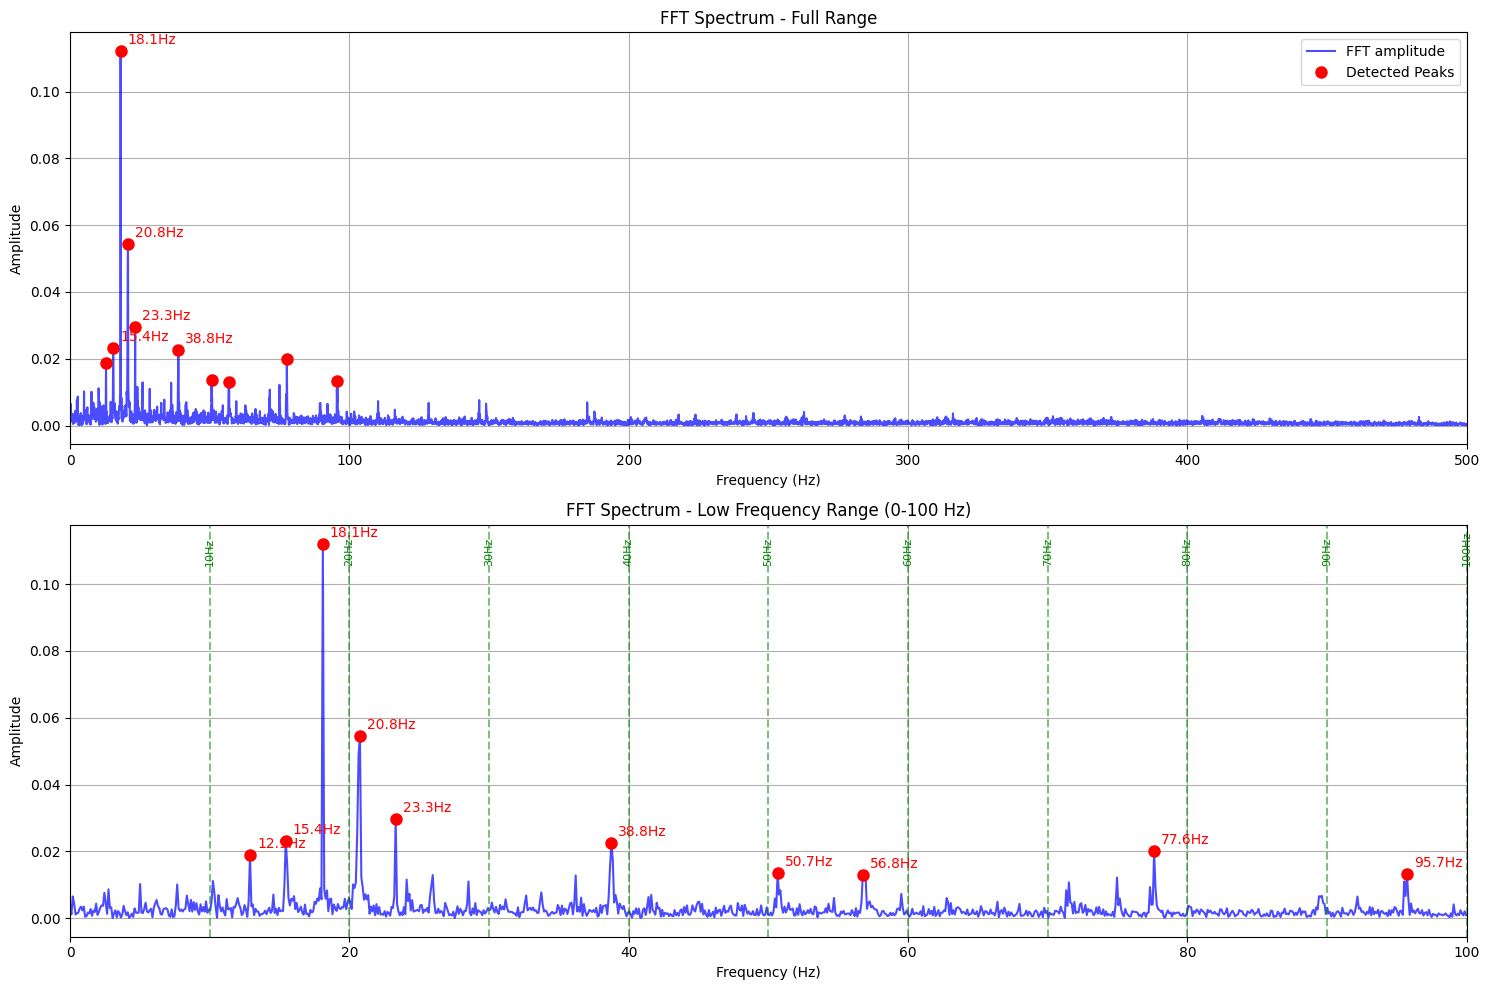

=== 검출된 피크 정보 ===
총 50개의 피크가 검출되었습니다.

상위 10개 피크 (진폭 순):
순위  주파수(Hz)   진폭     1400RPM 대비
----------------------------------------
 1.     18.10   0.1121     0.8x
 2.     20.76   0.0544     0.9x
 3.     23.31   0.0296     1.0x
 4.     15.44   0.0232     0.7x
 5.     38.76   0.0225     1.7x
 6.     77.61   0.0200     3.3x
 7.     12.89   0.0188     0.6x
 8.     50.66   0.0135     2.2x
 9.     95.71   0.0133     4.1x
10.     56.76   0.0130     2.4x

특별히 주목할 피크들:
• 기본 회전 주파수 근처: 23.31Hz (진폭: 0.0296)
• 하모닉 성분들:
  4차 하모닉 (93.3Hz 근처): 95.71Hz (진폭: 0.0133)
• 비하모닉 피크들 (베어링, 기어, 공명 등 의심):
  18.10Hz (진폭: 0.1121) - 0.8x 기본 주파수
  20.76Hz (진폭: 0.0544) - 0.9x 기본 주파수
  15.44Hz (진폭: 0.0232) - 0.7x 기본 주파수
  38.76Hz (진폭: 0.0225) - 1.7x 기본 주파수
  77.61Hz (진폭: 0.0200) - 3.3x 기본 주파수
  12.89Hz (진폭: 0.0188) - 0.6x 기본 주파수
  50.66Hz (진폭: 0.0135) - 2.2x 기본 주파수


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 간단한 피크 찾기 함수
def find_peaks_simple(data, height_threshold=None, distance=5):
    """
    간단한 피크 찾기 함수
    data: 입력 데이터
    height_threshold: 최소 높이 (기본값: 전체 최대값의 5%)
    distance: 피크 간 최소 거리
    """
    if height_threshold is None:
        height_threshold = 0.05 * np.max(data)  # 5% 임계값
    
    peaks = []
    for i in range(distance, len(data) - distance):
        # 현재 점이 주변 점들보다 높고, 임계값보다 크면 피크
        if (data[i] > height_threshold and 
            data[i] > data[i-1] and data[i] > data[i+1] and
            all(data[i] >= data[i-j] for j in range(1, distance+1)) and
            all(data[i] >= data[i+j] for j in range(1, distance+1))):
            peaks.append(i)
    
    return np.array(peaks)

# 1. 데이터 불러오기
data_file = '1400_N_2.txt'
data = []
with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue

data = np.array(data)
data = data[5:]  # 초기 5개 값 무시

# 이상치 제거
mean = np.mean(data)
std = np.std(data)
threshold = 3
filtered_data = data[(data > mean - threshold*std) & (data < mean + threshold*std)]

# 2. 샘플링 정보
fs = 2672.2  # Hz
N = len(filtered_data)

# 3. FFT 계산
fft_vals = np.fft.fft(filtered_data)
fft_freq = np.fft.fftfreq(N, d=1/fs)
fft_amp = 2.0/N * np.abs(fft_vals[:N//2])
fft_freq = fft_freq[:N//2]

# 4. 자동 피크 찾기
peaks = find_peaks_simple(fft_amp, height_threshold=0.03*np.max(fft_amp), distance=10)

# 피크를 진폭 크기 순으로 정렬 (상위 10개)
peak_heights = fft_amp[peaks]
sorted_indices = np.argsort(peak_heights)[::-1]
top_peaks = peaks[sorted_indices[:min(10, len(peaks))]]  # 최대 10개

# 5. 그래프 그리기
plt.figure(figsize=(15, 10))

# 전체 스펙트럼
plt.subplot(2, 1, 1)
plt.plot(fft_freq, fft_amp, 'b-', alpha=0.7, label='FFT amplitude')
plt.plot(fft_freq[top_peaks], fft_amp[top_peaks], 'ro', markersize=8, label='Detected Peaks')

# 상위 피크들에 주파수 라벨 표시
for i, peak_idx in enumerate(top_peaks[:5]):  # 상위 5개만 표시
    plt.annotate(f'{fft_freq[peak_idx]:.1f}Hz', 
                (fft_freq[peak_idx], fft_amp[peak_idx]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, ha='left', color='red')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum - Full Range')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)  # 0-500Hz 범위만 표시 (전체 나이퀴스트는 너무 넓음)

# 저주파 영역 확대 (0-100Hz)
plt.subplot(2, 1, 2)
low_freq_mask = fft_freq <= 100
plt.plot(fft_freq[low_freq_mask], fft_amp[low_freq_mask], 'b-', alpha=0.7)

# 100Hz 이하의 피크만 표시
low_freq_peaks = top_peaks[fft_freq[top_peaks] <= 100]
plt.plot(fft_freq[low_freq_peaks], fft_amp[low_freq_peaks], 'ro', markersize=8)

# 모든 저주파 피크에 라벨 표시
for peak_idx in low_freq_peaks:
    plt.annotate(f'{fft_freq[peak_idx]:.1f}Hz', 
                (fft_freq[peak_idx], fft_amp[peak_idx]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, ha='left', color='red')

# 600RPM = 10Hz와 그 하모닉들 표시
fundamental = 10.0
harmonics = [fundamental * i for i in range(1, 11) if fundamental * i <= 100]
for harm in harmonics:
    plt.axvline(x=harm, color='g', linestyle='--', alpha=0.5)
    plt.text(harm, plt.ylim()[1]*0.9, f'{harm:.0f}Hz', 
             rotation=90, ha='center', fontsize=8, color='green')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum - Low Frequency Range (0-100 Hz)')
plt.grid(True)
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

# 결과 출력
print("=== 검출된 피크 정보 ===")
print(f"총 {len(peaks)}개의 피크가 검출되었습니다.")
print()
print("상위 10개 피크 (진폭 순):")
print("순위  주파수(Hz)   진폭     1400RPM 대비")
print("-" * 40)

for i, peak_idx in enumerate(top_peaks):
    freq = fft_freq[peak_idx]
    amp = fft_amp[peak_idx]
    ratio = freq / 23.33  # 1400RPM = 23.33Hz
    print(f"{i+1:2d}.   {freq:7.2f}   {amp:.4f}   {ratio:5.1f}x")

print()
print("특별히 주목할 피크들:")
# 23.33Hz 근처 피크 찾기
near_23hz = [idx for idx in top_peaks if 22.5 <= fft_freq[idx] <= 24.5]
if near_23hz:
    idx = near_23hz[0]
    print(f"• 기본 회전 주파수 근처: {fft_freq[idx]:.2f}Hz (진폭: {fft_amp[idx]:.4f})")

# 하모닉 피크들 찾기
print("• 하모닉 성분들:")
for i in range(2, 9):  # 2차~8차 하모닉
    target = 23.33 * i
    nearby_peaks = [idx for idx in top_peaks if abs(fft_freq[idx] - target) < 3.0]
    if nearby_peaks:
        idx = nearby_peaks[0]
        print(f"  {i}차 하모닉 ({target:.1f}Hz 근처): {fft_freq[idx]:.2f}Hz (진폭: {fft_amp[idx]:.4f})")

# 비하모닉 피크들
print("• 비하모닉 피크들 (베어링, 기어, 공명 등 의심):")
for peak_idx in top_peaks[:8]:  # 상위 8개 중에서
    freq = fft_freq[peak_idx]
    ratio = freq / 23.33
    # 하모닉이 아닌 것들 (±10% 허용)
    if not any(abs(ratio - i) < 0.1 for i in range(1, 20)):
        print(f"  {freq:.2f}Hz (진폭: {fft_amp[peak_idx]:.4f}) - {ratio:.1f}x 기본 주파수")

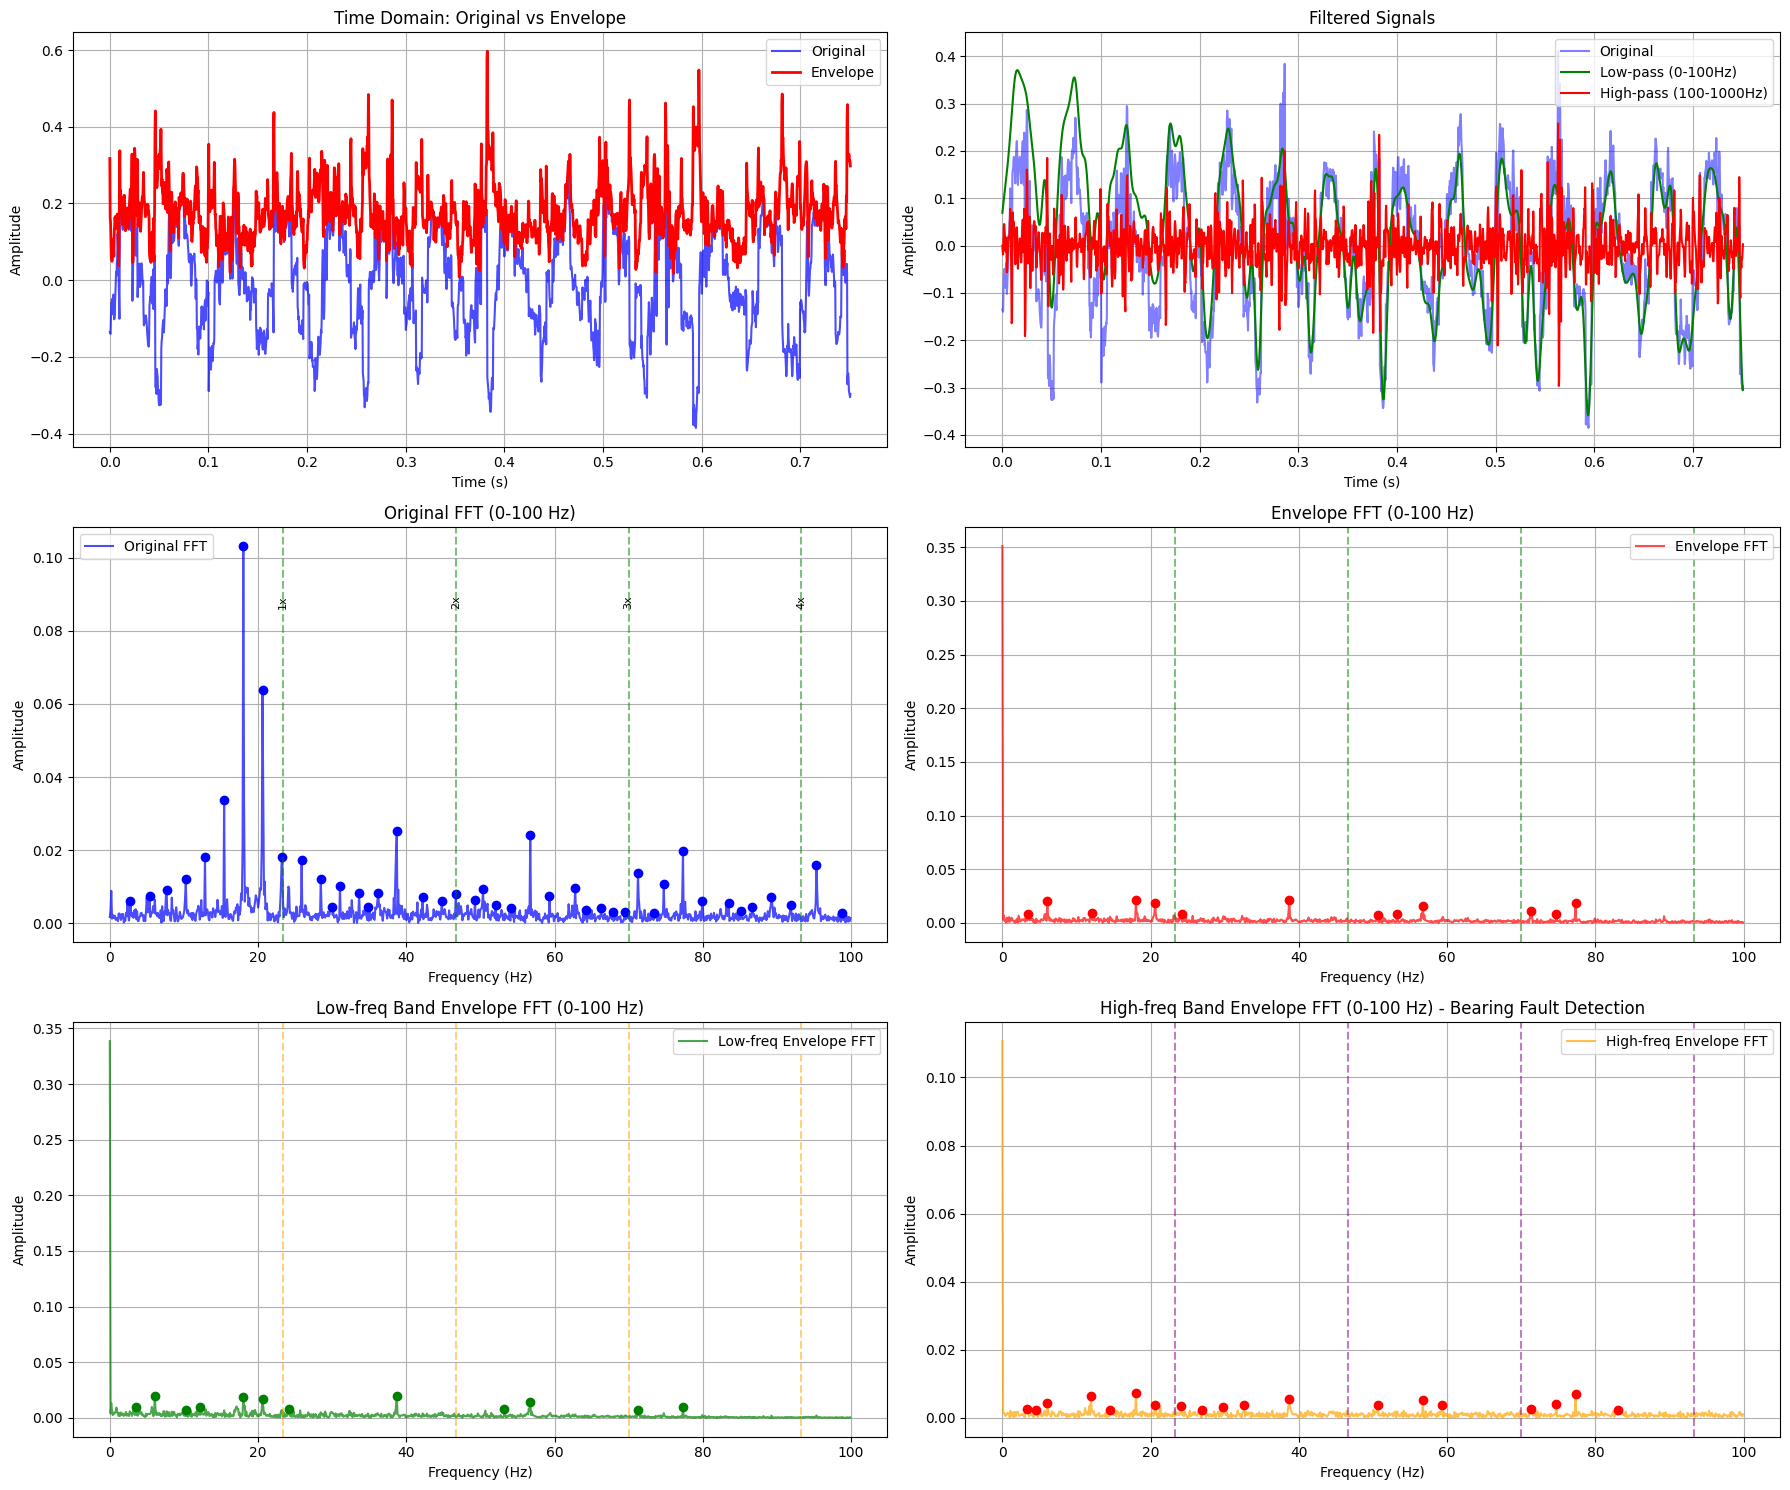

=== 분석 결과 비교 ===
1400 RPM = 23.33 Hz

1. 원본 FFT에서 검출된 상위 피크들:
   18.01 Hz (진폭: 0.1032) - 0.8x
   20.60 Hz (진폭: 0.0639) - 0.9x
   15.43 Hz (진폭: 0.0338) - 0.7x
   38.71 Hz (진폭: 0.0252) - 1.7x
   56.73 Hz (진폭: 0.0242) - 2.4x

2. Envelope FFT에서 검출된 상위 피크들:
   38.71 Hz (진폭: 0.0216) - 1.7x
   18.01 Hz (진폭: 0.0212) - 0.8x
   6.07 Hz (진폭: 0.0204) - 0.3x
   20.60 Hz (진폭: 0.0184) - 0.9x
   77.33 Hz (진폭: 0.0182) - 3.3x

3. 고주파 대역 Envelope FFT (베어링 결함 검출):
   18.01 Hz (진폭: 0.0072) - 0.8x
   77.33 Hz (진폭: 0.0070) - 3.3x
   11.94 Hz (진폭: 0.0065) - 0.5x
   38.71 Hz (진폭: 0.0056) - 1.7x

=== Envelope 분석의 장점 ===
• 변조된 신호에서 숨겨진 주파수 성분 검출
• 베어링 결함으로 인한 충격성 신호 강조
• 노이즈에 덜 민감
• 회전 불균형이나 미스얼라인먼트 검출에 유리


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, filtfilt

def envelope_analysis(data, fs, filter_band=None):
    """
    Envelope 분석 함수
    data: 입력 신호
    fs: 샘플링 주파수
    filter_band: 대역통과 필터 [low_freq, high_freq], None이면 전체 대역
    """
    filtered_data = data.copy()
    
    # 대역통과 필터 적용 (선택사항)
    if filter_band is not None:
        nyquist = fs / 2
        low = filter_band[0] / nyquist
        high = filter_band[1] / nyquist
        b, a = butter(4, [low, high], btype='band')
        filtered_data = filtfilt(b, a, data)
    
    # Hilbert 변환으로 envelope 계산
    analytic_signal = hilbert(filtered_data)
    envelope = np.abs(analytic_signal)
    
    return envelope, filtered_data

def find_peaks_simple(data, height_threshold=None, distance=5):
    """간단한 피크 찾기 함수"""
    if height_threshold is None:
        height_threshold = 0.05 * np.max(data)
    
    peaks = []
    for i in range(distance, len(data) - distance):
        if (data[i] > height_threshold and 
            data[i] > data[i-1] and data[i] > data[i+1] and
            all(data[i] >= data[i-j] for j in range(1, distance+1)) and
            all(data[i] >= data[i+j] for j in range(1, distance+1))):
            peaks.append(i)
    
    return np.array(peaks)

# 데이터 불러오기
data_file = '1400_N.txt'
data = []
with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue

data = np.array(data)[5:]  # 초기 값 제거

# 이상치 제거
mean = np.mean(data)
std = np.std(data)
filtered_data = data[(data > mean - 3*std) & (data < mean + 3*std)]

# 샘플링 정보
fs = 2662.4
N = len(filtered_data)
time = np.arange(N) / fs

# 1. 원본 FFT 분석
fft_vals = np.fft.fft(filtered_data)
fft_freq = np.fft.fftfreq(N, d=1/fs)[:N//2]
fft_amp = 2.0/N * np.abs(fft_vals[:N//2])

# 2. Envelope 분석 (여러 주파수 대역)
# 전체 대역 envelope
envelope_full, _ = envelope_analysis(filtered_data, fs)

# 저주파 대역 envelope (0-100Hz)
envelope_low, filtered_low = envelope_analysis(filtered_data, fs, [1, 100])

# 고주파 대역 envelope (100-1000Hz) - 베어링 결함 검출용
envelope_high, filtered_high = envelope_analysis(filtered_data, fs, [100, 1000])

# 3. Envelope의 FFT 분석
envelope_fft = np.fft.fft(envelope_full)
envelope_freq = np.fft.fftfreq(N, d=1/fs)[:N//2]
envelope_amp = 2.0/N * np.abs(envelope_fft[:N//2])

envelope_low_fft = np.fft.fft(envelope_low)
envelope_low_amp = 2.0/N * np.abs(envelope_low_fft[:N//2])

envelope_high_fft = np.fft.fft(envelope_high)
envelope_high_amp = 2.0/N * np.abs(envelope_high_fft[:N//2])

# 4. 피크 찾기
# 원본 FFT 피크
original_peaks = find_peaks_simple(fft_amp, height_threshold=0.02*np.max(fft_amp), distance=10)
original_peaks = np.array(original_peaks, dtype=int)  # 정수형으로 변환

# Envelope FFT 피크들
env_peaks = find_peaks_simple(envelope_amp, height_threshold=0.02*np.max(envelope_amp), distance=10)
env_peaks = np.array(env_peaks, dtype=int)

env_low_peaks = find_peaks_simple(envelope_low_amp, height_threshold=0.02*np.max(envelope_low_amp), distance=10)
env_low_peaks = np.array(env_low_peaks, dtype=int)

env_high_peaks = find_peaks_simple(envelope_high_amp, height_threshold=0.02*np.max(envelope_high_amp), distance=10)
env_high_peaks = np.array(env_high_peaks, dtype=int)

# 5. 그래프 그리기
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# 시간 도메인 비교
axes[0,0].plot(time[:2000], filtered_data[:2000], 'b-', alpha=0.7, label='Original')
axes[0,0].plot(time[:2000], envelope_full[:2000], 'r-', linewidth=2, label='Envelope')
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].set_title('Time Domain: Original vs Envelope')
axes[0,0].legend()
axes[0,0].grid(True)

# 필터링된 신호들
axes[0,1].plot(time[:2000], filtered_data[:2000], 'b-', alpha=0.5, label='Original')
axes[0,1].plot(time[:2000], filtered_low[:2000], 'g-', label='Low-pass (0-100Hz)')
axes[0,1].plot(time[:2000], filtered_high[:2000], 'r-', label='High-pass (100-1000Hz)')
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].set_title('Filtered Signals')
axes[0,1].legend()
axes[0,1].grid(True)

# FFT 스펙트럼 비교 (0-100Hz)
mask_100 = fft_freq <= 100
axes[1,0].plot(fft_freq[mask_100], fft_amp[mask_100], 'b-', alpha=0.7, label='Original FFT')
if len(original_peaks) > 0:
    # 100Hz 이하 피크만 표시
    orig_peaks_low = original_peaks[fft_freq[original_peaks] <= 100]
    if len(orig_peaks_low) > 0:
        axes[1,0].plot(fft_freq[orig_peaks_low], fft_amp[orig_peaks_low], 'bo', markersize=6)

# 1400 RPM 하모닉 표시
fundamental = 23.33
for i in range(1, 5):
    harm_freq = fundamental * i
    if harm_freq <= 100:
        axes[1,0].axvline(x=harm_freq, color='g', linestyle='--', alpha=0.5)
        axes[1,0].text(harm_freq, axes[1,0].get_ylim()[1]*0.8, f'{i}x', 
                      rotation=90, ha='center', fontsize=8)

axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Amplitude')
axes[1,0].set_title('Original FFT (0-100 Hz)')
axes[1,0].legend()
axes[1,0].grid(True)

# Envelope FFT 스펙트럼
axes[1,1].plot(envelope_freq[mask_100], envelope_amp[mask_100], 'r-', alpha=0.7, label='Envelope FFT')
if len(env_peaks) > 0:
    # 100Hz 이하 피크만 표시
    env_peaks_low = env_peaks[envelope_freq[env_peaks] <= 100]
    if len(env_peaks_low) > 0:
        axes[1,1].plot(envelope_freq[env_peaks_low], envelope_amp[env_peaks_low], 'ro', markersize=6)

# 하모닉 표시
for i in range(1, 5):
    harm_freq = fundamental * i
    if harm_freq <= 100:
        axes[1,1].axvline(x=harm_freq, color='g', linestyle='--', alpha=0.5)

axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].set_title('Envelope FFT (0-100 Hz)')
axes[1,1].legend()
axes[1,1].grid(True)

# 저주파 Envelope FFT
axes[2,0].plot(envelope_freq[mask_100], envelope_low_amp[mask_100], 'g-', alpha=0.7, label='Low-freq Envelope FFT')
if len(env_low_peaks) > 0:
    env_low_peaks_100 = env_low_peaks[envelope_freq[env_low_peaks] <= 100]
    if len(env_low_peaks_100) > 0:
        axes[2,0].plot(envelope_freq[env_low_peaks_100], envelope_low_amp[env_low_peaks_100], 'go', markersize=6)

for i in range(1, 5):
    harm_freq = fundamental * i
    if harm_freq <= 100:
        axes[2,0].axvline(x=harm_freq, color='orange', linestyle='--', alpha=0.5)

axes[2,0].set_xlabel('Frequency (Hz)')
axes[2,0].set_ylabel('Amplitude')
axes[2,0].set_title('Low-freq Band Envelope FFT (0-100 Hz)')
axes[2,0].legend()
axes[2,0].grid(True)

# 고주파 Envelope FFT (베어링 결함 검출용)
axes[2,1].plot(envelope_freq[mask_100], envelope_high_amp[mask_100], 'orange', alpha=0.7, label='High-freq Envelope FFT')
if len(env_high_peaks) > 0:
    env_high_peaks_100 = env_high_peaks[envelope_freq[env_high_peaks] <= 100]
    if len(env_high_peaks_100) > 0:
        axes[2,1].plot(envelope_freq[env_high_peaks_100], envelope_high_amp[env_high_peaks_100], 'ro', markersize=6)

for i in range(1, 5):
    harm_freq = fundamental * i
    if harm_freq <= 100:
        axes[2,1].axvline(x=harm_freq, color='purple', linestyle='--', alpha=0.5)

axes[2,1].set_xlabel('Frequency (Hz)')
axes[2,1].set_ylabel('Amplitude')
axes[2,1].set_title('High-freq Band Envelope FFT (0-100 Hz) - Bearing Fault Detection')
axes[2,1].legend()
axes[2,1].grid(True)

plt.tight_layout()
plt.show()

# 결과 분석
print("=== 분석 결과 비교 ===")
print(f"1400 RPM = {fundamental:.2f} Hz")
print()

print("1. 원본 FFT에서 검출된 상위 피크들:")
if len(original_peaks) > 0:
    orig_sorted = original_peaks[np.argsort(fft_amp[original_peaks])[::-1]]
    for i, peak_idx in enumerate(orig_sorted[:5]):
        freq = fft_freq[peak_idx]
        if freq <= 100:
            ratio = freq / fundamental
            print(f"   {freq:.2f} Hz (진폭: {fft_amp[peak_idx]:.4f}) - {ratio:.1f}x")
else:
    print("   검출된 피크 없음!")

print("\n2. Envelope FFT에서 검출된 상위 피크들:")
if len(env_peaks) > 0:
    env_sorted = env_peaks[np.argsort(envelope_amp[env_peaks])[::-1]]
    for i, peak_idx in enumerate(env_sorted[:5]):
        freq = envelope_freq[peak_idx]
        if freq <= 100:
            ratio = freq / fundamental
            print(f"   {freq:.2f} Hz (진폭: {envelope_amp[peak_idx]:.4f}) - {ratio:.1f}x")
else:
    print("   검출된 피크 없음!")

print("\n3. 고주파 대역 Envelope FFT (베어링 결함 검출):")
if len(env_high_peaks) > 0:
    high_sorted = env_high_peaks[np.argsort(envelope_high_amp[env_high_peaks])[::-1]]
    for i, peak_idx in enumerate(high_sorted[:5]):
        freq = envelope_freq[peak_idx]
        if freq <= 100:
            ratio = freq / fundamental
            print(f"   {freq:.2f} Hz (진폭: {envelope_high_amp[peak_idx]:.4f}) - {ratio:.1f}x")
else:
    print("   검출된 피크 없음!")

print("\n=== Envelope 분석의 장점 ===")
print("• 변조된 신호에서 숨겨진 주파수 성분 검출")
print("• 베어링 결함으로 인한 충격성 신호 강조")
print("• 노이즈에 덜 민감")
print("• 회전 불균형이나 미스얼라인먼트 검출에 유리")

In [61]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks

# # 데이터 불러오기 및 전처리 (기존 코드와 동일)
# data_file = '600_N.txt'
# data = []
# with open(data_file, 'r') as f:
#     for line in f:
#         try:
#             value = float(line.strip())
#             data.append(value)
#         except ValueError:
#             continue

# data = np.array(data)
# data = data[5:]  # 초기 5개 값 무시

# # 이상치 제거
# mean = np.mean(data)
# std = np.std(data)
# threshold = 3
# filtered_data = data[(data > mean - threshold*std) & (data < mean + threshold*std)]

# # 샘플링 정보
# fs = 2672.2  # Hz
# N = len(filtered_data)
# dt = 1/fs

# # 시간 축
# time = np.arange(N) * dt

# # FFT 계산
# fft_vals = np.fft.fft(filtered_data)
# fft_freq = np.fft.fftfreq(N, d=dt)
# fft_amp = 2.0/N * np.abs(fft_vals[:N//2])
# fft_freq = fft_freq[:N//2]

# # 피크 찾기 (prominence를 사용하여 의미있는 피크만 찾기)
# peaks, properties = find_peaks(fft_amp, height=0.01*np.max(fft_amp), distance=10)

# # 상위 10개 피크 찾기
# peak_heights = fft_amp[peaks]
# sorted_indices = np.argsort(peak_heights)[::-1][:10]
# top_peaks = peaks[sorted_indices]
# top_peak_freqs = fft_freq[top_peaks]
# top_peak_amps = fft_amp[top_peaks]

# # 기본 주파수와 하모닉 계산
# fundamental_freq = 10.0  # 600 RPM = 10 Hz
# harmonics = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * fundamental_freq

# # 그래프 그리기
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# # 1. 시간 도메인 신호
# ax1.plot(time[:1000], filtered_data[:1000])  # 처음 1000개 포인트만 표시
# ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Amplitude')
# ax1.set_title('Time Domain Signal (First 1000 points)')
# ax1.grid(True)

# # 2. 전체 FFT 스펙트럼
# ax2.plot(fft_freq, fft_amp, 'b-', alpha=0.7, label='FFT Spectrum')
# ax2.plot(fft_freq[top_peaks], fft_amp[top_peaks], 'ro', markersize=8, label='Top Peaks')

# # 하모닉 표시
# for i, harm_freq in enumerate(harmonics):
#     if harm_freq <= fs/2:
#         ax2.axvline(x=harm_freq, color='g', linestyle='--', alpha=0.5, 
#                    label=f'{i+1}x harmonic' if i < 3 else '')

# ax2.set_xlabel('Frequency (Hz)')
# ax2.set_ylabel('Amplitude')
# ax2.set_title('FFT Spectrum with Harmonics')
# ax2.legend()
# ax2.grid(True)
# ax2.set_xlim(0, 200)  # 0-200Hz 범위에 집중

# # 3. 저주파 영역 확대 (0-100Hz)
# ax3.plot(fft_freq, fft_amp, 'b-', alpha=0.7)
# ax3.plot(fft_freq[top_peaks], fft_amp[top_peaks], 'ro', markersize=8)

# # 주요 피크에 주파수 라벨 표시
# for freq, amp in zip(top_peak_freqs[:5], top_peak_amps[:5]):
#     if freq <= 100:
#         ax3.annotate(f'{freq:.1f}Hz', (freq, amp), 
#                     xytext=(5, 5), textcoords='offset points',
#                     fontsize=9, ha='left')

# # 하모닉 표시
# for i, harm_freq in enumerate(harmonics[:10]):
#     if harm_freq <= 100:
#         ax3.axvline(x=harm_freq, color='g', linestyle='--', alpha=0.5)
#         ax3.text(harm_freq, ax3.get_ylim()[1]*0.9, f'{i+1}x', 
#                 rotation=90, ha='center', fontsize=8)

# ax3.set_xlabel('Frequency (Hz)')
# ax3.set_ylabel('Amplitude')
# ax3.set_title('Low Frequency Range (0-100 Hz)')
# ax3.grid(True)
# ax3.set_xlim(0, 100)

# plt.tight_layout()
# plt.show()

# # 분석 결과 출력
# print("=== 진동 분석 결과 ===")
# print(f"기본 회전 주파수: {fundamental_freq:.1f} Hz (600 RPM)")
# print(f"샘플링 주파수: {fs:.1f} Hz")
# print(f"데이터 포인트 수: {N}")
# print(f"주파수 분해능: {fs/N:.3f} Hz")
# print()

# print("상위 10개 피크:")
# for i, (freq, amp) in enumerate(zip(top_peak_freqs, top_peak_amps)):
#     # 기본 주파수의 몇 배인지 계산
#     harmonic_ratio = freq / fundamental_freq
#     print(f"{i+1:2d}. {freq:6.2f} Hz (진폭: {amp:.4f}) - {harmonic_ratio:.1f}x 기본 주파수")

# print()
# print("80Hz 근처 피크 분석:")
# hz_80_range = np.where((fft_freq >= 75) & (fft_freq <= 85))[0]
# if len(hz_80_range) > 0:
#     max_idx_in_range = hz_80_range[np.argmax(fft_amp[hz_80_range])]
#     freq_80 = fft_freq[max_idx_in_range]
#     amp_80 = fft_amp[max_idx_in_range]
#     harmonic_ratio_80 = freq_80 / fundamental_freq
#     print(f"80Hz 근처 최대 피크: {freq_80:.2f} Hz (진폭: {amp_80:.4f})")
#     print(f"이는 기본 주파수의 {harmonic_ratio_80:.1f}배입니다.")
    
#     if abs(harmonic_ratio_80 - 8) < 0.2:
#         print("→ 이는 8차 하모닉으로 보입니다.")
#     else:
#         print("→ 이는 하모닉이 아닐 수 있습니다. 베어링 결함이나 기어 맞물림을 확인해보세요.")

# print()
# print("가능한 원인:")
# print("1. 8차 하모닉 (10Hz × 8 = 80Hz)")
# print("2. 베어링 결함 주파수")
# print("3. 기어 맞물림 주파수 (기어 이빨 수 × 회전 주파수)")
# print("4. 블레이드/날개 통과 주파수")
# print("5. 구조물 공명 주파수")